# Documentation

Jupyter Notebook used to prepare my capstone presentation.

## Database Setup

Tenhou (online mahjong client) gameplay logs downloaded from https://pathofhouou.blogspot.com/2021/04/guide-replay-analysis.html

Logs to be found in 'logs' folder as "2016-2020.db" files

Merged with "mergedbs.py" script to create "e4p.db", "es3p.db", and "es4p.db". Only "es4p.db" is relevant, which are 4-Player South games

Logs are in a compressed format similar to computer chess board representation https://en.wikipedia.org/wiki/Board_representation_(computer_chess)

(example log below)

In [1]:
import sqlite3
dbfile = 'logs/es4p.db'
con = sqlite3.connect(dbfile)
cur = con.cursor()
cur.execute('SELECT * FROM logs LIMIT 1')
results = cur.fetchall()
for row in results:
    print(row[0])
    print(row[1])
    print(row[2])
con.close()

2016010100gm-00a9-0000-4f02b0d8
2016
b'BZh91AY&SY\x01\x82T\xbc\x00\x10\xa6\x1f\x80R\x0f\xff\xe7?\xff\xff\xf0?\xff\xff\xf0`\x19\x7f>\xfan\xbb\xa5$\x1fM\x12H\xa9\xbe\xf7<\xddw{m\xd8k\x1f^ k\x10\xd6\xeb\xdd{\xde\xf3r\xee>\xcc\xfa\xef\x19\xf7\xce\xe3\xa1<\x85\xb1\x8a\xa1U\x05R\xaa\x86\xb1\x01J \x84\x8114\xd0i\xa3#&\x98L\x98#\x012d\xc4\x85OP)\x00&\x98\x00\x00&\x01\x19\xa8\xd3\t\x91\xa6\x8a5\x18\x1aC&j*\x9f\xe9)\xe5?T\xd0\xd1\xa6\x9a44hhh\xda\x9a\x01\xb0\xa0\x1a\x98d\xd2IJ2z\x80\xd0\x1a4\xf4\x8fPh\x00\x00\x00"zd\x04\xa4\x89\x1f\xaa\x06OQ\xe547\xaa?J\x00\x00\x00\x00Ji\x06\x84\x10M\r\x12\x9e4\xcax\x98\x9a\x02\x9e\xa7\xa9\xeaa2=CD0\x1e\x90\xf0HN\xcc\xcc\xdc\xe8`;\x10\xd3C\x07\x83\x07\xa5\xd8`\xed\xfc\xde\xac\xc8@u\x8e\xce3\x82d\x03\x8d\xbb\xa7\x93\x8b\xbfGOI)\xf4D(\xafM$\x18\x04\xd2\x187\xcc\xdf\x03\xcc\x81\x90\x98\x10\xc0>\x18\x08"\xd7\x886\x9a\xd6\x80j\rF\x02\xd5\xd4\xe9\xb7\x80da\x12\xe6vH\x81B\x04r\xa8L\x0b&g\x0bd>c8d\x1c?\xf9<\xd6\x97p\xc1\x9d\x9a !\xcdH<\x10\x96\xeb\xe0k\x9bzyMO\xa2$\x00\

## batch_analysis.py

run this file in the console to parse and analyze logs, will end up outputting a "RiichiWaits.csv" file in the 'results' folder

###### analyzers = [DiscardTenpaiInfo()]

this loads the main analysis script "discard_tenpai_info.py"

###### cursor.execute('SELECT * FROM logs LIMIT 10000')

adjust the amount of games to process

###### 

the rest of the files handle the actual analysis and output, however comprehensive knowledge of the riichi mahjong ruleset is required to fully decipher them. a rough guide can be found here https://github.com/NegativeMjark/tenhou-log

## log_analyzer.py

abstract method container class

## log_hand_analyzer.py

base class, initialises game information to be stored

ParseLog function processes each possible type of action in a round

all following functions define what the code does when each action occurs. only barebones functions, so this file currently loads the log and runs through it without doing anything

the file is not called directly, but rather a custom analysis class is built on top of it (in this case "discard_tenpai_info.py")

## discard_tenpai_info.py

custom class for this project, commented out parts are from the original file from which this was modified from

overrides base functions from "log_hand_analyzer.py" using "analysis_utils.py" and "tenpai_waits.py" to decode the information within the logs

writes output into a "RiichiWaits.csv" file in the 'results' folder

## analysis_utils.py

the "rules" of mahjong, decodes the compressed format of the .db files

## tenpai_waits.py

separate algorithm that calculates what tiles a hand is waiting on

## 

## Modelling

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df = pd.read_csv('results/RiichiWaits.csv', index_col=False)
df

,Wait,1s,2s,3s,4s,5s,6s,7s,8s,9s,...,7m,8m,9m,Ew,Sw,Ww,Nw,Wd,Gd,Rd
0,3,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
1,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,1,1,0
3,3,0,0,0,0,0,0,1,0,1,...,1,0,1,1,1,0,0,1,0,1
4,3,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288751,1,0,1,1,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,1,1
288752,3,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,1,0,1,0,1
288753,1,0,0,0,0,1,0,0,0,0,...,0,1,0,1,1,0,1,0,0,1
288754,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,1


Wait Type      -  Frequency  -  Weight
3 (Middle)     -    42.78 %  -    1
2 (Neighbour)  -    28.36 %  -    1.51
1 (Terminal)   -    23.02 %  -    1.86
0 (Honor)      -     5.84 %  -    7.33


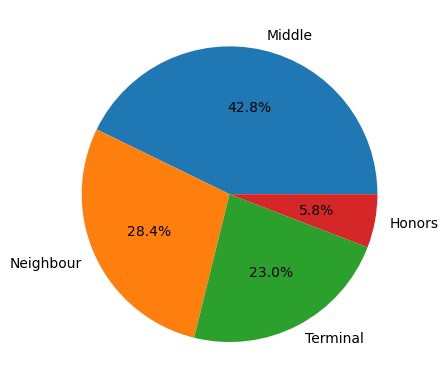

In [4]:
freq = df['Wait'].value_counts()
print("Wait Type      -  Frequency  -  Weight")
print("3 (Middle)     -   ", round(freq[3]/288756*100, 2), "%  -   ", round(freq[3]/freq[3]))
print("2 (Neighbour)  -   ", round(freq[2]/288756*100, 2), "%  -   ", round(freq[3]/freq[2], 2))
print("1 (Terminal)   -   ", round(freq[1]/288756*100, 2), "%  -   ", round(freq[3]/freq[1], 2))
print("0 (Honor)      -    ", round(freq[0]/288756*100, 2), "%  -   ", round(freq[3]/freq[0], 2))

plt.pie([42.78, 28.36, 23.02, 5.84], labels=["Middle", "Neighbour", "Terminal", "Honors"], autopct='%1.1f%%')
plt.show()

The feature columns disregard order and duplicates within the discard pile.
This is justifiable, as although discard order and duplicates do reveal slightly more information, it is not only too much for the scope of this project, but also often too much for a real player to bother considering things in such detail.

It is possible for a wait to be on multiple tiles, but I have chosen to categories different waits into 4 types.
The target column prioritises waits in the following sequence: Honors [0] > Terminals [1] > Neighbours [2] > Middle Tiles [3]

This means that if the set of tiles a hand is waiting on contains an Honor, it will always be marked as [0]
And a wait marked as [3] means none of the waits are Honor, Terminal or Neighbour tiles.

This is fine as players use this order when defending. A real player would prefer to risk an Honor tile over a Terminal, over of a Neighbour, over a Middle tile. Therefore if a wait contains an Honor tile, it has a very high danger rating regardless of what the other waits are.

### Split the Data into train/test sets

In [5]:
X = df.drop(['Wait'], axis=1)
y = df['Wait']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Baseline Logistic Regression Model

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# create and fit the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# make predictions on the testing set
y_pred_lr = lr.predict(X_test)

# evaluate the performance of the model
score = lr.score(X_test, y_test)
print("Score:", score, "\n")
print(classification_report(y_test, y_pred_lr))

Score: 0.4377337581382463 

              precision    recall  f1-score   support

           0       0.32      0.01      0.01      3338
           1       0.36      0.07      0.12     13265
           2       0.39      0.14      0.20     16375
           3       0.45      0.89      0.60     24774

    accuracy                           0.44     57752
   macro avg       0.38      0.28      0.23     57752
weighted avg       0.40      0.44      0.34     57752



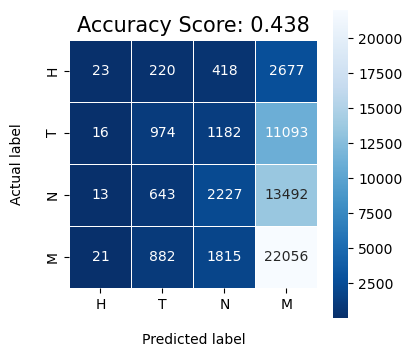

In [7]:
cm_lr = metrics.confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(4,4))
sns.heatmap(cm_lr, annot=True, fmt="", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label\n');
plt.xlabel('\nPredicted label');
plt.xticks([0.5, 1.5, 2.5, 3.5], labels=['H', 'T', 'N', 'M'])
plt.yticks([0.5, 1.5, 2.5, 3.5], labels=['H', 'T', 'N', 'M'])
all_sample_title = 'Accuracy Score: {0}'.format(round(score, 3))
plt.title(all_sample_title, size = 15);

As we can see, this simple Logistic Regression Model has an overall accuracy of below 50%.
However, considering the context of mahjong we are not expecting a high accuracy in the first place.
It is notoriously difficult to deduce someones wait, to the point where often the best one can do is guess.
Although we would still like to improve the accuracy, this is actually a pretty competent baseline.

Regarding the confusion matrix, the most interesting takeaways are not actually from the diagonal (correct predictions), but rather the top right corner and bottom left corner. The top right corner represents a situation where we preceive less danger than there actually is, redulting in a deal-in. The bottom left corner represents when we are too cautious.

In other words, due to the inherent order of the labels [0-1-2-3], false predictions of label [0] are not nearly as disastrous. This is because if a player thinks that even Honors [0] are unsafe, then they will "hard-fold" which reduces deal-in risk dramatically. However, we will not discuss the difference between "hard" and "soft" folding here. This analysis is mainly beneficial for when a player wants to "soft" fold.

In [8]:
def danger_rating(y_pred, y_test, printit=True):
    total, diag, safe, danger = 0, 0, 0, 0
    for x in range(len(y_pred)):
        total += 1
        # HONORS
        if y_pred[x] == 0:
            if y_test.iloc[x] != 0:
                safe += 1
            else: diag += 1
        # TERMINALS
        elif y_pred[x] == 1:
            if y_test.iloc[x] == 0:
                danger += 1
            elif y_test.iloc[x] == 1:
                diag += 1
            else: safe += 1
        # NEIGHBOURS
        elif y_pred[x] == 2:
            if y_test.iloc[x] == 3:
                safe += 1
            elif y_test.iloc[x] == 2:
                diag += 1
            else: danger += 1
        # MIDDLE
        if y_pred[x] == 3:
            if y_test.iloc[x] != 3:
                danger += 1
            else: diag += 1

    if printit == True:
        print("total", total, "check", diag+safe+danger)
        print("diag", diag)
        print("safe", safe)
        print("danger", danger)
        print("\nDANGER PERCENT", danger/total*100)
        print("COWARD PERCENT", safe/total*100)
    else:
        return total, diag, safe, danger

In [9]:
danger_rating(y_pred_lr, y_test)

total 57752 check 57752
diag 25280
safe 3390
danger 29082

DANGER PERCENT 50.356697603546195
COWARD PERCENT 5.869926582629173


### Neural Network Model Architecture

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
# Set up the model architecture
model = Sequential()

# Add the first hidden layer
model.add(Dense(34, activation = 'relu', input_shape = (X_train.shape[1], )))
# Add the second hidden layer
model.add(Dense(10, activation = 'relu'))
# Add the output layer
model.add(Dense(4, activation = 'softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 34)                1190      
                                                                 
 dense_1 (Dense)             (None, 10)                350       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,584
Trainable params: 1,584
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

### Fit the training data

In [13]:
# Fit the model
history = model.fit(
    X_train,
    pd.get_dummies(y_train),
    validation_split = 0.2,
    batch_size = 25000,
    epochs = 100,
    shuffle = True,
    class_weight = {0: 7.33, 1: 1.86, 2: 1.51, 3: 1.00},
    verbose = 1)

Epoch 1/100
8/8 [==============================] - 1s 33ms/step - loss: 2.4206 - accuracy: 0.2697 - val_loss: 1.4002 - val_accuracy: 0.2844
Epoch 2/100
8/8 [==============================] - 0s 13ms/step - loss: 2.3948 - accuracy: 0.2833 - val_loss: 1.3933 - val_accuracy: 0.2783
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 2.3799 - accuracy: 0.2681 - val_loss: 1.3932 - val_accuracy: 0.2571
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 2.3711 - accuracy: 0.2515 - val_loss: 1.3910 - val_accuracy: 0.2496
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 2.3647 - accuracy: 0.2527 - val_loss: 1.3851 - val_accuracy: 0.2594
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 2.3579 - accuracy: 0.2639 - val_loss: 1.3796 - val_accuracy: 0.2714
Epoch 7/100
8/8 [==============================] - 0s 15ms/step - loss: 2.3502 - accuracy: 0.2716 - val_loss: 1.3779 - val_accuracy: 0.2743
Epoch 8/100
8/8 [===

8/8 [==============================] - 0s 13ms/step - loss: 2.2737 - accuracy: 0.3192 - val_loss: 1.3475 - val_accuracy: 0.3143
Epoch 60/100
8/8 [==============================] - 0s 13ms/step - loss: 2.2735 - accuracy: 0.3151 - val_loss: 1.3436 - val_accuracy: 0.3164
Epoch 61/100
8/8 [==============================] - 0s 13ms/step - loss: 2.2734 - accuracy: 0.3192 - val_loss: 1.3478 - val_accuracy: 0.3145
Epoch 62/100
8/8 [==============================] - 0s 14ms/step - loss: 2.2732 - accuracy: 0.3185 - val_loss: 1.3438 - val_accuracy: 0.3168
Epoch 63/100
8/8 [==============================] - 0s 13ms/step - loss: 2.2731 - accuracy: 0.3182 - val_loss: 1.3467 - val_accuracy: 0.3144
Epoch 64/100
8/8 [==============================] - 0s 12ms/step - loss: 2.2730 - accuracy: 0.3176 - val_loss: 1.3426 - val_accuracy: 0.3179
Epoch 65/100
8/8 [==============================] - 0s 13ms/step - loss: 2.2729 - accuracy: 0.3217 - val_loss: 1.3500 - val_accuracy: 0.3111
Epoch 66/100
8/8 [========

### Evaluate the model

In [14]:
# evaluate the performance of the model
loss, accuracy = model.evaluate(
    X_test,
    pd.get_dummies(y_test),
    batch_size = 25000,
    verbose=0
)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.3458129167556763
Test accuracy: 0.3151232898235321


1805/1805 [==============================] - 2s 793us/step


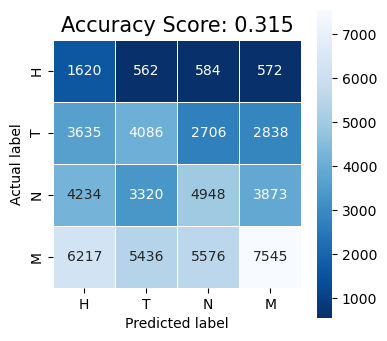

In [15]:
# predict the class labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# create a confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_classes, labels=[0, 1, 2, 3])
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.xticks([0.5, 1.5, 2.5, 3.5], labels=['H', 'T', 'N', 'M'])
plt.yticks([0.5, 1.5, 2.5, 3.5], labels=['H', 'T', 'N', 'M'])
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy, 3))
plt.title(all_sample_title, size = 15);

In [16]:
danger_rating(y_pred_classes, y_test)

total 57752 check 57752
diag 18199
safe 28418
danger 11135

DANGER PERCENT 19.28071755090733
COWARD PERCENT 49.206953871727386


This is a significant decrease in overall accuracy, however it results in a huge improvement to the DANGER rating. The COWARD percentage has increased to 50%, but this is acceptable as standard mahjong theory prioritises defensive play.

Ideally, we would like Danger% to decrease with a minimal Coward% increase, so lets try different hyperparameters.

### Testing Different Class Weights

In [17]:
weight_list = []
danger_list = []
coward_list = []

for x in range(0,21):
    weight_list.append(1+(x*0.5))
    # Fit Model
    model.fit(
        X_train,
        pd.get_dummies(y_train),
        validation_split = 0.2,
        batch_size = 25000,
        epochs = 100,
        shuffle = True,
        class_weight = {0: 1+(x*0.5), 1: 1.86, 2: 1.51, 3: 1.00},
        verbose = 0
    )

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    total, diag, safe, danger = danger_rating(y_pred_classes, y_test, printit = False)
    danger_list.append(danger/total*100)
    coward_list.append(safe/total*100)

1805/1805 [==============================] - 1s 673us/step


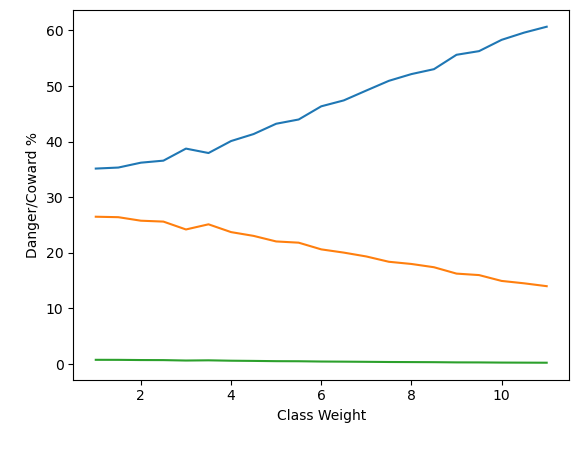

In [18]:
plt.xlabel('Class Weight\n');
plt.ylabel('\nDanger/Coward %');
plt.plot(weight_list, coward_list)
plt.plot(weight_list, danger_list)
plt.plot(weight_list, np.divide(danger_list, coward_list))

As we can see from the green line, changing the class weight only really changes the proportion of wrongly classified entries to prefer estimating in a "safer" way. This means the wrongly classified entries are more often Middle Tiles [3] rather than the rest.

This is fine for this project though, as we can now adjust how safe our model should be.

The next step for improving this model is increasing the % of correctly classified entries, as that will result in decreasing the Coward% alongside Danger%. Ideally, both graphs should trend downwards.

However, this may already be the limit of accuracy given the current dataset. Adding discard order and duplicate information would help, but most likely only slightly. Even if we took in to account all the information of the game state at that current time, it would be impossible to guess the wait correctly more than (just throwing a gut-feeling number out) 60% of the time I'm guessing.

### So how does a human compare?

I tried to predict 100 entries and these were my results:

correct: 34%

danger: 30%

coward: 36%

If we were just randomly guessing, there are 16 boxes so 6.25% chance each resulting in:

correct: 25%

danger: 37.5%

coward: 37.5%

So we can conclude the neural network is already on par with - if not better than - a human player in terms of guessing waits. (Of course it still has a long way to go before actually being able to play a game). With the class weights used, this NN is hyper-defensive but can get up to about 44% Correct% depending on how defensive or offensive we adjust it to be.